***Project Title:*** Mental Health Prediction


Project Description: We're about to predict mental health of a random child under these criteria as follows....

* Gender
* Class
* Acquiring Personal Interest
* Going out though health risk
* Studying properly
* Concentrate on study
* Participationg online class
* Getting enough food
* Feel anger to family members
* Upbraid parents
* spent quality times
* Relatives house
* Miss friend
This dataset contains 15 questionnaire answers collected from online by google forms

***Import Library***

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
import pydotplus
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import  confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

***Read dataset to pandas dataframe***

In [2]:
df=pd.read_csv('Data')
df

,Timestamp,Name (নাম),Age(বয়স),Gender(লিঙ্গ),Which class are you in?(তুমি কোন শ্রেণীতে পড়?),District(জেলা),What is your personal interest?(তুমি কি করতে পছন্দ করো?),Can you acquire it now?(তোমার পছন্দের কাজটি তুমি কি এখন করতে পারতেছ?),In spite of health risk do you want to go out to acquire it?(করোনা থাকা সত্ত্বেও তুমি কি বাইরে গিয়ে তোমার পছন্দের কাজটি করতে চাও?),Do you think Covid-19 Pandemic hampers yours study?(তুমি কি মনে করো কোভিড-19 মহামারী তোমার পড়াশোনার ক্ষতি করছে?),Can you concentrate in your study like before?(তুমি কি তোমার পড়াশোনায় আগের মত মনোযোগ দিতে পারতেছ?),Do you know about online classes in Sangsad Tv?(সংসদ টিভিতে প্রচার হওয়া অনলাইন ক্লাস এর ব্যাপারে তুমি জানো কি?),Are you participate online classes through Sangsad Tv arranged by govt?(সংসদ টিভিতে প্রচার হওয়া অনলাইন ক্লাসে তুমি অংশগ্রহণ করো?),Can you have your favorite foods now?(তোমার প্রিয় খাবারগুলো তুমি কি এখন পাচ্ছ?),Do you feel anger to anyone for not having the permission to do your favorite things?(তোমার প্রিয় কাজগুলো করতে না দেওয়ায় তোমার কি কারো উপর মন খারাপ?),Do you get more upbraid from your parents about mischief in the house than before?(বাসায় দুষ্টুমি করার জন্য তোমার বাবা-মা কি তোমাকে আগের চেয়ে বেশি বকাবকি করে?),Do you think because of this pandemic you spend more quality times with your family than before?(তুমি কি মনে করো এই মহামারীর প্রাদুর্ভাব এর ফলে তোমার পরিবার তোমাকে আগের চেয়ে বেশি সময় দিচ্ছে?),relative_house,Do you miss the hangouts with your school friends?(তুমি কি তোমার স্কুলের বন্ধুদের সাথে সময় কাটানো কে মিস করছো?),target
0,2020/07/04 11:56:09 AM GMT+6,Meherajul Islam Shishir,16,Male,10,Chandpur,Playing outside,No,No,Yes,No,Yes,No,No,Yes,Sometimes,Yes,No,Yes,Partial
1,2020/07/04 12:10:00 PM GMT+6,Ishrat Jahan,15,Female,10,Rangpur,Drawing,Yes,No,Yes,Yes,Yes,Sometimes,Yes,Yes,No,No,No,Yes,Partial
2,2020/07/04 12:12:26 PM GMT+6,Md. Nasiruddin,14,Male,8,Bogura,Fishing,Yes,Not necessary,Yes,No,No,No,No,No,Yes,Yes,Yes,Yes,Partial
3,2020/07/04 12:18:11 PM GMT+6,Md. Shihab Hossain,12,Male,7,Bogura,Traveling,No,No,Yes,No,Yes,Sometimes,Yes,No,Sometimes,Yes,Yes,Yes,Partial
4,2020/07/04 12:18:19 PM GMT+6,Mahfuz Hossain,14,Male,7,Chandpur,Playing outside,No,No,Yes,No,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,2020/12/23 12:29:28 PM GMT+6,Shohan,17,Male,10,Bogura,Paying outside,No,No,Yes,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes
697,2020/12/23 12:30:47 PM GMT+6,Risha,9,Female,4,Bogura,Reading books,Partial,No,Yes,No,Yes,Sometimes,Little bit,No,Sometimes,Yes,Yes,Yes,Partial
698,2020/12/23 12:33:37 PM GMT+6,Rifat,5,Male,1,Bogura,Playing outside,No,Yes,No,Yes,No,No,Yes,No,No,Yes,Yes,No,Partial
699,2020/12/23 12:34:37 PM GMT+6,Maya,5,Female,1,Bogura,Watching tv,Yes,No,May be,No,No,No,Yes,No,Yes,Yes,Yes,Yes,Partial


In [3]:
df = df.rename(columns= {'Gender(লিঙ্গ)' : 'gender'})
df = df.rename(columns= {'Which class are you in?(তুমি কোন শ্রেণীতে পড়?)' : 'class'})
df = df.rename(columns= {'Can you acquire it now?(তোমার পছন্দের কাজটি তুমি কি এখন করতে পারতেছ?)' : 'acquire_personal_interest'})
df = df.rename(columns= {'In spite of health risk do you want to go out to acquire it?(করোনা থাকা সত্ত্বেও তুমি কি বাইরে গিয়ে তোমার পছন্দের কাজটি করতে চাও?)' : 'go_outside'})
df = df.rename(columns= {'Do you think Covid-19 Pandemic hampers yours study?(তুমি কি মনে করো কোভিড-19 মহামারী তোমার পড়াশোনার ক্ষতি করছে?)' : 'hamper_study'})
df = df.rename(columns= {'Can you concentrate in your study like before?(তুমি কি তোমার পড়াশোনায় আগের মত মনোযোগ দিতে পারতেছ?)' : 'concentrate_study'})
df = df.rename(columns= {'Are you participate online classes through Sangsad Tv arranged by govt?(সংসদ টিভিতে প্রচার হওয়া অনলাইন ক্লাসে তুমি অংশগ্রহণ করো?)' : 'participate_online_class'})
df = df.rename(columns= {'Can you have your favorite foods now?(তোমার প্রিয় খাবারগুলো তুমি কি এখন পাচ্ছ?)' : 'favorite_food'})
df = df.rename(columns= {'Do you feel anger to anyone for not having the permission to do your favorite things?(তোমার প্রিয় কাজগুলো করতে না দেওয়ায় তোমার কি কারো উপর মন খারাপ?)' : 'feel_anger'})
df = df.rename(columns= {'Do you get more upbraid from your parents about mischief in the house than before?(বাসায় দুষ্টুমি করার জন্য তোমার বাবা-মা কি তোমাকে আগের চেয়ে বেশি বকাবকি করে?)' : 'upbraid'})
df = df.rename(columns= {'Do you think because of this pandemic you spend more quality times with your family than before?(তুমি কি মনে করো এই মহামারীর প্রাদুর্ভাব এর ফলে তোমার পরিবার তোমাকে আগের চেয়ে বেশি সময় দিচ্ছে?)' : 'spend_quality_time'})
df = df.rename(columns= {'Do you miss the hangouts with your school friends?(তুমি কি তোমার স্কুলের বন্ধুদের সাথে সময় কাটানো কে মিস করছো?)' : 'hangouts'})

In [4]:
df

,Timestamp,Name (নাম),Age(বয়স),gender,class,District(জেলা),What is your personal interest?(তুমি কি করতে পছন্দ করো?),acquire_personal_interest,go_outside,hamper_study,concentrate_study,Do you know about online classes in Sangsad Tv?(সংসদ টিভিতে প্রচার হওয়া অনলাইন ক্লাস এর ব্যাপারে তুমি জানো কি?),participate_online_class,favorite_food,feel_anger,upbraid,spend_quality_time,relative_house,hangouts,target
0,2020/07/04 11:56:09 AM GMT+6,Meherajul Islam Shishir,16,Male,10,Chandpur,Playing outside,No,No,Yes,No,Yes,No,No,Yes,Sometimes,Yes,No,Yes,Partial
1,2020/07/04 12:10:00 PM GMT+6,Ishrat Jahan,15,Female,10,Rangpur,Drawing,Yes,No,Yes,Yes,Yes,Sometimes,Yes,Yes,No,No,No,Yes,Partial
2,2020/07/04 12:12:26 PM GMT+6,Md. Nasiruddin,14,Male,8,Bogura,Fishing,Yes,Not necessary,Yes,No,No,No,No,No,Yes,Yes,Yes,Yes,Partial
3,2020/07/04 12:18:11 PM GMT+6,Md. Shihab Hossain,12,Male,7,Bogura,Traveling,No,No,Yes,No,Yes,Sometimes,Yes,No,Sometimes,Yes,Yes,Yes,Partial
4,2020/07/04 12:18:19 PM GMT+6,Mahfuz Hossain,14,Male,7,Chandpur,Playing outside,No,No,Yes,No,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,2020/12/23 12:29:28 PM GMT+6,Shohan,17,Male,10,Bogura,Paying outside,No,No,Yes,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes
697,2020/12/23 12:30:47 PM GMT+6,Risha,9,Female,4,Bogura,Reading books,Partial,No,Yes,No,Yes,Sometimes,Little bit,No,Sometimes,Yes,Yes,Yes,Partial
698,2020/12/23 12:33:37 PM GMT+6,Rifat,5,Male,1,Bogura,Playing outside,No,Yes,No,Yes,No,No,Yes,No,No,Yes,Yes,No,Partial
699,2020/12/23 12:34:37 PM GMT+6,Maya,5,Female,1,Bogura,Watching tv,Yes,No,May be,No,No,No,Yes,No,Yes,Yes,Yes,Yes,Partial


In [5]:
df = df.drop('Timestamp', 1)
df = df.drop('Name (নাম)', 1)
df = df.drop('Age(বয়স)', 1)
df = df.drop('District(জেলা)', 1)
df = df.drop('What is your personal interest?(তুমি কি করতে পছন্দ করো?)', 1)
df = df.drop('Do you know about online classes in Sangsad Tv?(সংসদ টিভিতে প্রচার হওয়া অনলাইন ক্লাস এর ব্যাপারে তুমি জানো কি?)', 1)

In [6]:
df

,gender,class,acquire_personal_interest,go_outside,hamper_study,concentrate_study,participate_online_class,favorite_food,feel_anger,upbraid,spend_quality_time,relative_house,hangouts,target
0,Male,10,No,No,Yes,No,No,No,Yes,Sometimes,Yes,No,Yes,Partial
1,Female,10,Yes,No,Yes,Yes,Sometimes,Yes,Yes,No,No,No,Yes,Partial
2,Male,8,Yes,Not necessary,Yes,No,No,No,No,Yes,Yes,Yes,Yes,Partial
3,Male,7,No,No,Yes,No,Sometimes,Yes,No,Sometimes,Yes,Yes,Yes,Partial
4,Male,7,No,No,Yes,No,No,No,No,Yes,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,Male,10,No,No,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes
697,Female,4,Partial,No,Yes,No,Sometimes,Little bit,No,Sometimes,Yes,Yes,Yes,Partial
698,Male,1,No,Yes,No,Yes,No,Yes,No,No,Yes,Yes,No,Partial
699,Female,1,Yes,No,May be,No,No,Yes,No,Yes,Yes,Yes,Yes,Partial


***Data Analysis***

In [7]:
df['target'].value_counts()

Partial    375
Yes        272
No          54
Name: target, dtype: int64

In [8]:
df['gender'].value_counts()

Male      378
Female    323
Name: gender, dtype: int64

In [9]:
df['class'].value_counts()

10    95
6     89
4     76
9     71
5     70
3     69
7     66
1     65
8     63
2     37
Name: class, dtype: int64

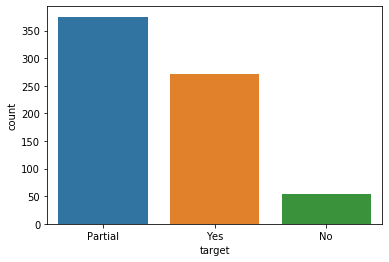

In [10]:
seaborn.countplot(df['target'])

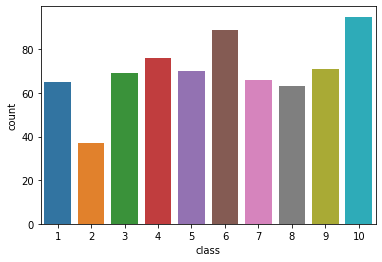

In [11]:
seaborn.countplot(df['class'])

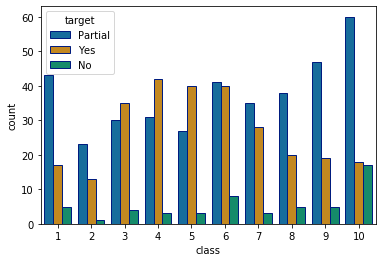

In [12]:
seaborn.countplot(x='class',hue='target',data=df,palette='colorblind',edgecolor=seaborn.color_palette('dark',n_colors=1))

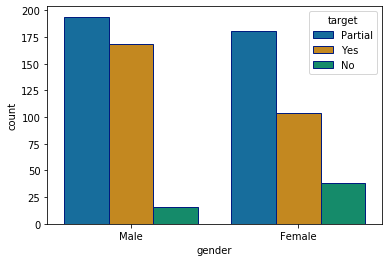

In [13]:
seaborn.countplot(x='gender',hue='target',data=df,palette='colorblind',edgecolor=seaborn.color_palette('dark',n_colors=1))

***Split our dataset into its attributes and labels***

In [14]:
le_x= LabelEncoder()
df.gender = le_x.fit_transform(df.gender)
df.acquire_personal_interest = le_x.fit_transform(df.acquire_personal_interest)
df.go_outside = le_x.fit_transform(df.go_outside)
df.hamper_study = le_x.fit_transform(df.hamper_study)
df.concentrate_study = le_x.fit_transform(df.concentrate_study)
df.participate_online_class = le_x.fit_transform(df.participate_online_class)
df.favorite_food = le_x.fit_transform(df.favorite_food)
df.feel_anger = le_x.fit_transform(df.feel_anger)
df.upbraid = le_x.fit_transform(df.upbraid)
df.spend_quality_time = le_x.fit_transform(df.spend_quality_time)
df.relative_house = le_x.fit_transform(df.relative_house)
df.hangouts = le_x.fit_transform(df.hangouts)

In [15]:
df

,gender,class,acquire_personal_interest,go_outside,hamper_study,concentrate_study,participate_online_class,favorite_food,feel_anger,upbraid,spend_quality_time,relative_house,hangouts,target
0,1,10,0,0,2,0,0,1,1,1,1,0,1,Partial
1,0,10,2,0,2,1,1,2,1,0,0,0,1,Partial
2,1,8,2,1,2,0,0,1,0,2,1,1,1,Partial
3,1,7,0,0,2,0,1,2,0,1,1,1,1,Partial
4,1,7,0,0,2,0,0,1,0,2,1,1,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,1,10,0,0,2,0,0,1,1,2,1,1,1,Yes
697,0,4,1,0,2,0,1,0,0,1,1,1,1,Partial
698,1,1,0,2,1,1,0,2,0,0,1,1,0,Partial
699,0,1,2,0,0,0,0,2,0,2,1,1,1,Partial


In [16]:
x=df.iloc[:,:-1]
x

,gender,class,acquire_personal_interest,go_outside,hamper_study,concentrate_study,participate_online_class,favorite_food,feel_anger,upbraid,spend_quality_time,relative_house,hangouts
0,1,10,0,0,2,0,0,1,1,1,1,0,1
1,0,10,2,0,2,1,1,2,1,0,0,0,1
2,1,8,2,1,2,0,0,1,0,2,1,1,1
3,1,7,0,0,2,0,1,2,0,1,1,1,1
4,1,7,0,0,2,0,0,1,0,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,1,10,0,0,2,0,0,1,1,2,1,1,1
697,0,4,1,0,2,0,1,0,0,1,1,1,1
698,1,1,0,2,1,1,0,2,0,0,1,1,0
699,0,1,2,0,0,0,0,2,0,2,1,1,1


In [17]:
y=df.iloc[:,13]
y

0      Partial
1      Partial
2      Partial
3      Partial
4          Yes
        ...   
696        Yes
697    Partial
698    Partial
699    Partial
700        Yes
Name: target, Length: 701, dtype: object

***Train Test Split***

In [18]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=.3,random_state=1)

***Feature Scalling***

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

In [20]:
xtrain

array([[ 0.88787452,  1.45162381, -0.92948536, ...,  0.40484008,
         0.61666984,  0.3101562 ],
       [-1.12628527, -0.2874854 ,  1.24448994, ...,  0.40484008,
         0.61666984,  0.3101562 ],
       [ 0.88787452,  0.06033644, -0.92948536, ...,  0.40484008,
         0.61666984,  0.3101562 ],
       ...,
       [-1.12628527, -1.67877277,  1.24448994, ...,  0.40484008,
        -1.62161328,  0.3101562 ],
       [ 0.88787452, -1.33095093, -0.92948536, ...,  0.40484008,
         0.61666984,  0.3101562 ],
       [-1.12628527,  0.75598013,  1.24448994, ...,  0.40484008,
        -1.62161328,  0.3101562 ]])

In [21]:
ytrain

146        Yes
214    Partial
500    Partial
165    Partial
323    Partial
        ...   
144    Partial
645         No
72     Partial
235        Yes
37     Partial
Name: target, Length: 490, dtype: object

In [22]:
xtest

array([[ 1.01432054, -1.7502145 , -0.99098325, ...,  0.38306544,
         0.60107431,  0.28644595],
       [ 1.01432054,  0.05474767, -0.99098325, ...,  0.38306544,
         0.60107431,  0.28644595],
       [ 1.01432054,  0.4157401 , -0.99098325, ...,  0.38306544,
         0.60107431,  0.28644595],
       ...,
       [ 1.01432054,  1.13772497,  0.08683874, ...,  0.38306544,
         0.60107431,  0.28644595],
       [ 1.01432054,  0.77673253, -0.99098325, ...,  0.38306544,
         0.60107431,  0.28644595],
       [ 1.01432054,  0.4157401 , -0.99098325, ...,  0.38306544,
         0.60107431,  0.28644595]])

In [23]:
ytest

400        Yes
552        Yes
526    Partial
648         No
574    Partial
        ...   
681         No
301        Yes
579    Partial
103    Partial
529    Partial
Name: target, Length: 211, dtype: object

Evaluating the Algorithm ***Decision tree***

In [24]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree = dtree.fit(xtrain,ytrain)

In [25]:
y_pred = dtree.predict(xtest)
print(confusion_matrix(ytest, y_pred))
print(classification_report(ytest, y_pred))

[[ 5  7  0]
 [ 6 99 12]
 [ 0  4 78]]
              precision    recall  f1-score   support

          No       0.45      0.42      0.43        12
     Partial       0.90      0.85      0.87       117
         Yes       0.87      0.95      0.91        82

    accuracy                           0.86       211
   macro avg       0.74      0.74      0.74       211
weighted avg       0.86      0.86      0.86       211



In [26]:
dtree.score(xtest,ytest)

0.8625592417061612

Evaluating the Algorithm ***KNN***

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [28]:
y_pred = knn.predict(xtest)
print(confusion_matrix(ytest, y_pred))
print(classification_report(ytest, y_pred))

[[  5   7   0]
 [  3 111   3]
 [  0   4  78]]
              precision    recall  f1-score   support

          No       0.62      0.42      0.50        12
     Partial       0.91      0.95      0.93       117
         Yes       0.96      0.95      0.96        82

    accuracy                           0.92       211
   macro avg       0.83      0.77      0.80       211
weighted avg       0.91      0.92      0.92       211



In [29]:
knn.score(xtest,ytest)

0.919431279620853

Evaluating the Algorithm ***Naive Bayes***

In [30]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(xtrain, ytrain) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [31]:
y_pred = gnb.predict(xtest)
print(confusion_matrix(ytest, y_pred))
print(classification_report(ytest, y_pred))

[[ 12   0   0]
 [  3 111   3]
 [  0  12  70]]
              precision    recall  f1-score   support

          No       0.80      1.00      0.89        12
     Partial       0.90      0.95      0.92       117
         Yes       0.96      0.85      0.90        82

    accuracy                           0.91       211
   macro avg       0.89      0.93      0.91       211
weighted avg       0.92      0.91      0.91       211



In [32]:
gnb.score(xtest,ytest)

0.9146919431279621

Evaluating the Algorithm ***SVM***

In [33]:
from sklearn.svm import SVC
sv=SVC(C=1.0, kernel='rbf', degree=3, gamma='auto')
sv.fit(xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
y_pred = sv.predict(xtest)
print(confusion_matrix(ytest, y_pred))
print(classification_report(ytest, y_pred))

[[  7   5   0]
 [  1 112   4]
 [  0   8  74]]
              precision    recall  f1-score   support

          No       0.88      0.58      0.70        12
     Partial       0.90      0.96      0.93       117
         Yes       0.95      0.90      0.92        82

    accuracy                           0.91       211
   macro avg       0.91      0.81      0.85       211
weighted avg       0.92      0.91      0.91       211



In [35]:
sv.score(xtest,ytest)

0.9146919431279621

Evaluating the Algorithm ***Random Forest***

In [127]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',n_estimators=100)
rf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [128]:
y_pred = rf.predict(xtest)
print(confusion_matrix(ytest, y_pred))
print(classification_report(ytest, y_pred))

[[  6   6   0]
 [  1 112   4]
 [  0   7  75]]
              precision    recall  f1-score   support

          No       0.86      0.50      0.63        12
     Partial       0.90      0.96      0.93       117
         Yes       0.95      0.91      0.93        82

    accuracy                           0.91       211
   macro avg       0.90      0.79      0.83       211
weighted avg       0.91      0.91      0.91       211



In [129]:
rf.score(xtest,ytest)

0.9146919431279621

In [130]:
print("Decision Tree: ", dtree.score(xtest,ytest)*100,"%")
print("KNN: ",knn.score(xtest,ytest)*100,"%")
print("Gaussian Naive Bayes: ", gnb.score(xtest,ytest)*100,"%")
print("SVM: ", sv.score(xtest,ytest)*100,"%")
print("Random Forest: ", rf.score(xtest,ytest)*100,"%")

Decision Tree:  86.25592417061611 %
KNN:  91.9431279620853 %
Gaussian Naive Bayes:  91.4691943127962 %
SVM:  91.4691943127962 %
Random Forest:  91.4691943127962 %


In [131]:
rf.score(xtest,ytest)

0.9146919431279621